#### Import necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### Check Nan Values

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Check duplicate values

In [9]:
df.duplicated().sum()

0

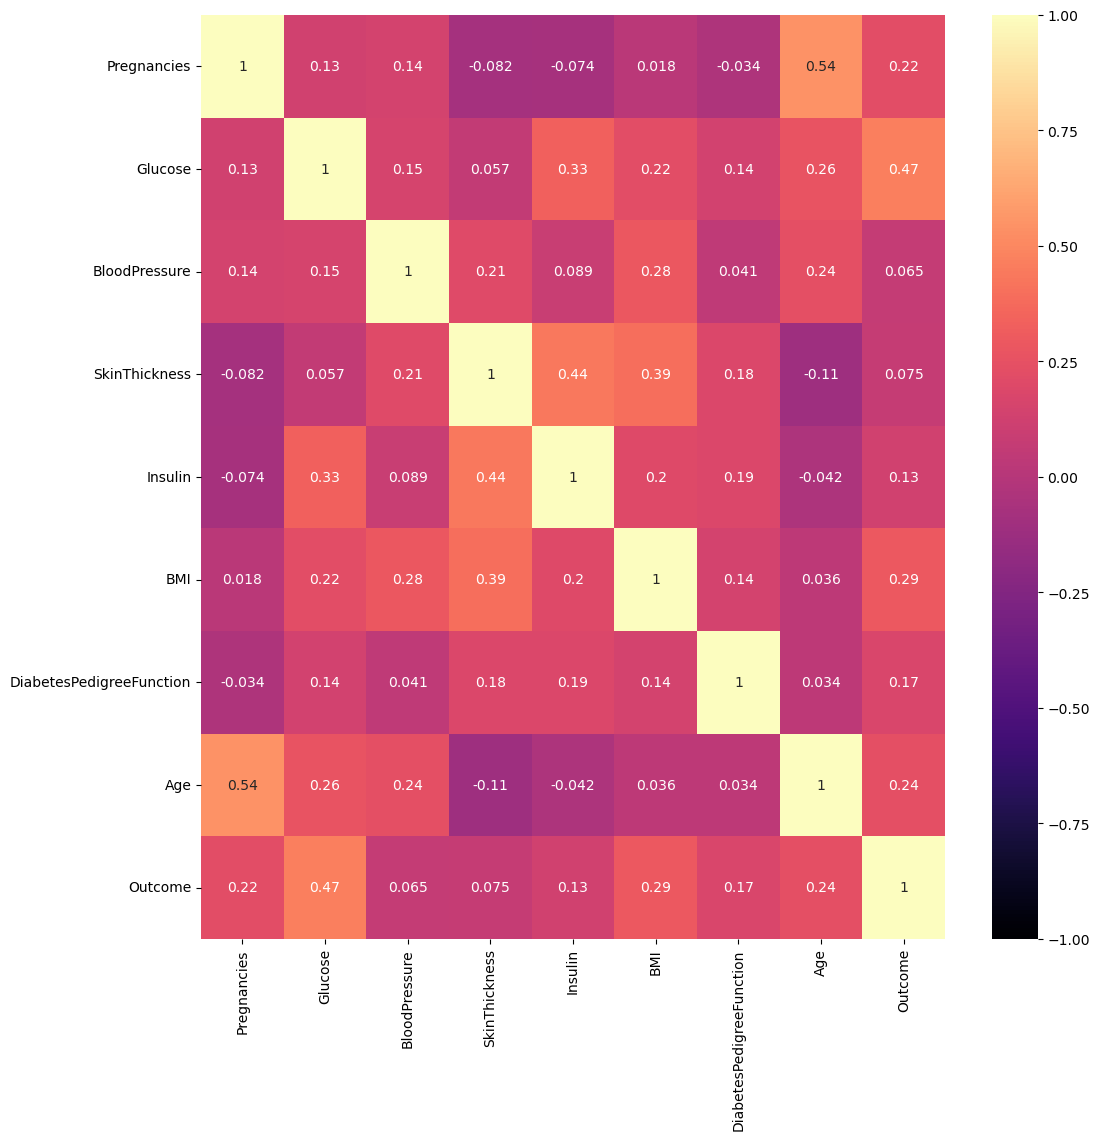

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,vmax=1 ,vmin=-1,data=df,cmap="magma")
plt.show()

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [11]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

In [12]:
# df.Glucose =df.Glucose.replace(0,df.Glucose.mean())
# df.BloodPressure =df.BloodPressure.replace(0,df.BloodPressure.mean())
# df.SkinThickness =df.SkinThickness.replace(0,df.SkinThickness.mean())
# df.Insulin =df.Insulin.replace(0,df.Insulin.mean())
# df.BMI =df.BMI.replace(0,df.BMI.mean())

#### Write a function to solve the problem

In [13]:
def dealwithZero(datframe,col):
    datframe[col] =datframe[col].replace(0,datframe[col].mean())
    return datframe[col]

dealwithZero(df,"Glucose")

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [14]:
dealwithZero(df,"BloodPressure")

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

In [15]:
dealwithZero(df,"SkinThickness")

0      35.000000
1      29.000000
2      20.536458
3      23.000000
4      35.000000
         ...    
763    48.000000
764    27.000000
765    23.000000
766    20.536458
767    31.000000
Name: SkinThickness, Length: 768, dtype: float64

In [16]:
dealwithZero(df,"Insulin")

0       79.799479
1       79.799479
2       79.799479
3       94.000000
4      168.000000
          ...    
763    180.000000
764     79.799479
765    112.000000
766     79.799479
767     79.799479
Name: Insulin, Length: 768, dtype: float64

In [17]:
dealwithZero(df,"BMI")

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

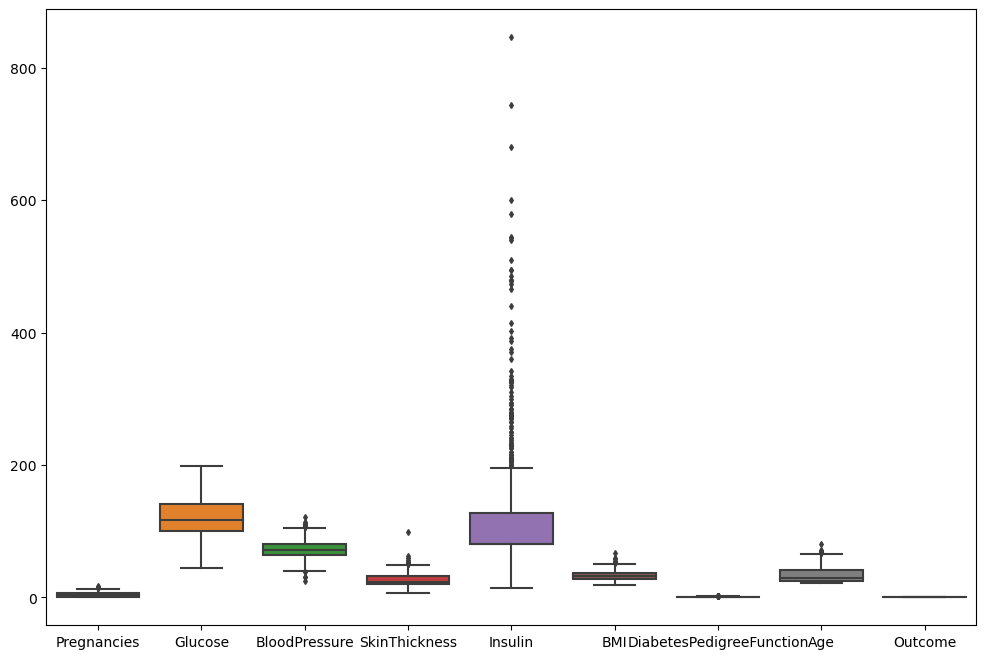

In [18]:
fig,ax =plt.subplots(figsize=(12,8))
sns.boxplot(data=df ,ax=ax,fliersize=3)
plt.show()

In [19]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### Segregate th X & y variable 

In [20]:
X =df.iloc[:,:-1] ## Independant variable
y =df.iloc[:,-1] ## dependant Variable

In [21]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### Model training

In [23]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test =train_test_split(X,y,test_size=0.28,random_state=0)
X_train.shape ,X_test.shape

((552, 8), (216, 8))

In [24]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
243            6    119.0           50.0      22.000000  176.000000   
397            0    131.0           66.0      40.000000   79.799479   
294            0    161.0           50.0      20.536458   79.799479   
504            3     96.0           78.0      39.000000   79.799479   
400            4     95.0           64.0      20.536458   79.799479   
..           ...      ...            ...            ...         ...   
763           10    101.0           76.0      48.000000  180.000000   
192            7    159.0           66.0      20.536458   79.799479   
629            4     94.0           65.0      22.000000   79.799479   
559           11     85.0           74.0      20.536458   79.799479   
684            5    136.0           82.0      20.536458   79.799479   

           BMI  DiabetesPedigreeFunction  Age  
243  27.100000                     1.318   33  
397  34.300000                     0.196   22  
294  21.900000                     0.254   65  
504  37.300000                     0.238   40  
400  32.000000                     0.161   31  
..         ...                       ...  ...  
763  32.900000                     0.171   63  
192  30.400000                     0.383   36  
629  24.700000                     0.148   21  
559  30.100000                     0.300   35  
684  31.992578                     0.640   69  

[552 rows x 8 columns]

In [25]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
661            1    199.0           76.0      43.000000   79.799479  42.9   
122            2    107.0           74.0      30.000000  100.000000  33.6   
113            4     76.0           62.0      20.536458   79.799479  34.0   
14             5    166.0           72.0      19.000000  175.000000  25.8   
529            0    111.0           65.0      20.536458   79.799479  24.6   
..           ...      ...            ...            ...         ...   ...   
553            1     88.0           62.0      24.000000   44.000000  29.9   
299            8    112.0           72.0      20.536458   79.799479  23.6   
101            1    151.0           60.0      20.536458   79.799479  26.1   
315            2    112.0           68.0      22.000000   94.000000  34.1   
92             7     81.0           78.0      40.000000   48.000000  46.7   

     DiabetesPedigreeFunction  Age  
661                     1.394   22  
122                     0.404   23  
113                     0.391   25  
14                      0.587   51  
529                     0.660   31  
..                        ...  ...  
553                     0.422   23  
299                     0.840   58  
101                     0.179   22  
315                     0.315   26  
92                      0.261   42  

[216 rows x 8 columns]

#### Scaling If required 

In [26]:
import pickle
from sklearn.preprocessing import StandardScaler
def Scaling(X_train ,X_test):
    ### Initialize ohject of standard scaler
    scaler =StandardScaler()
    ## Fit the training data
    X_train =scaler.fit_transform(X_train)
    ## Fit testingh data
    X_test  =scaler.transform(X_test)
    ### Return the data
    
    ###Saving the model
    file =open("Standard_scaler.pkl","wb")
    pickle.dump(scaler ,file)
    file.close()
    return X_train ,X_test

In [27]:
X_train ,X_test =Scaling(X_train ,X_test)
X_train

array([[ 0.62824341, -0.11109231, -1.91900398, ..., -0.804101  ,
         2.53569669, -0.05896573],
       [-1.12914018,  0.28612465, -0.57522127, ...,  0.22646242,
        -0.82163375, -0.97701675],
       [-1.12914018,  1.27916707, -1.91900398, ..., -1.54839681,
        -0.64808191,  2.61172815],
       ...,
       [ 0.04244888, -0.93862765, -0.65920769, ..., -1.14762214,
        -0.96526286, -1.06047593],
       [ 2.09272973, -1.23654038,  0.09667009, ..., -0.37469958,
        -0.51043734,  0.10795264],
       [ 0.33534614,  0.45163172,  0.76856144, ..., -0.10380766,
         0.50693552,  2.94556489]])

In [28]:
X_test

array([[-0.83624291,  2.53702079,  0.26464292, ...,  1.45741317,
         2.76310944, -0.97701675],
       [-0.54334565, -0.50830927,  0.09667009, ...,  0.12626875,
        -0.19924094, -0.89355756],
       [ 0.04244888, -1.5344531 , -0.91116695, ...,  0.18352227,
        -0.23814049, -0.7266392 ],
       ...,
       [-0.83624291,  0.94815293, -1.07913978, ..., -0.94723481,
        -0.87250239, -0.97701675],
       [-0.54334565, -0.34280221, -0.40724843, ...,  0.19783565,
        -0.46555325, -0.64318001],
       [ 0.92114067, -1.36894603,  0.43261576, ...,  2.00132164,
        -0.62713599,  0.69216693]])

#### Model Building

In [29]:
from sklearn.linear_model import LogisticRegression
log_model =LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

In [30]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test ,y_pred))
print("==============================================")
print(accuracy_score(y_test ,y_pred))
print("==============================================")
print(classification_report(y_test ,y_pred))

[[135  14]
 [ 29  38]]
0.8009259259259259
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       149
           1       0.73      0.57      0.64        67

    accuracy                           0.80       216
   macro avg       0.78      0.74      0.75       216
weighted avg       0.79      0.80      0.79       216



In [32]:
conf_mat =confusion_matrix(y_test ,y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [33]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8009259259259259

In [34]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9060402684563759

In [35]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.823170731707317

In [36]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8626198083067093

#### Hyperparameter tunning used grid search CV

In [37]:
from sklearn.model_selection import GridSearchCV
clf =LogisticRegression()
param ={"penalty":["l1","l2","elasticnet"],"C":np.logspace(1,5,10),"solver":['newton-cg', 'lbfgs', 'liblinear']}

logistic_clf =GridSearchCV(estimator=clf ,param_grid=param ,scoring="accuracy",cv=5)
logistic_clf.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [38]:
logistic_clf.best_score_

0.7535790335790336

In [39]:
logistic_clf.best_params_

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [40]:
y_grid_pred=logistic_clf.predict(X_test)
y_grid_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
confusion_matrix(y_test ,y_grid_pred)

array([[134,  15],
       [ 29,  38]], dtype=int64)

In [42]:
accuracy_score(y_test ,y_grid_pred)

0.7962962962962963

In [43]:
print(classification_report(y_test ,y_grid_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       149
           1       0.72      0.57      0.63        67

    accuracy                           0.80       216
   macro avg       0.77      0.73      0.75       216
weighted avg       0.79      0.80      0.79       216



In [44]:
import pickle

file =open("logistic_clf.plk","wb")
pickle.dump(logistic_clf ,file)
file.close()